In [2]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


In [3]:

# Load the dataset
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/dataset/Parkinsons Dataset.xlsx')


In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [5]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
numeric_features


['MDVP:Fo(Hz)',
 'MDVP:Fhi(Hz)',
 'MDVP:Flo(Hz)',
 'MDVP:Jitter(%)',
 'MDVP:Jitter(Abs)',
 'MDVP:RAP',
 'MDVP:PPQ',
 'Jitter:DDP',
 'MDVP:Shimmer',
 'MDVP:Shimmer(dB)',
 'Shimmer:APQ3',
 'Shimmer:APQ5',
 'MDVP:APQ',
 'Shimmer:DDA',
 'NHR',
 'HNR',
 'status',
 'RPDE',
 'DFA',
 'spread1',
 'spread2',
 'D2',
 'PPE']

In [6]:

# Preprocessing: Drop the 'status' column and select only numeric columns for scaling
x = df.drop('status', axis=1)
x_numeric = x.select_dtypes(include=[np.number])
y = df['status']  # Target variable



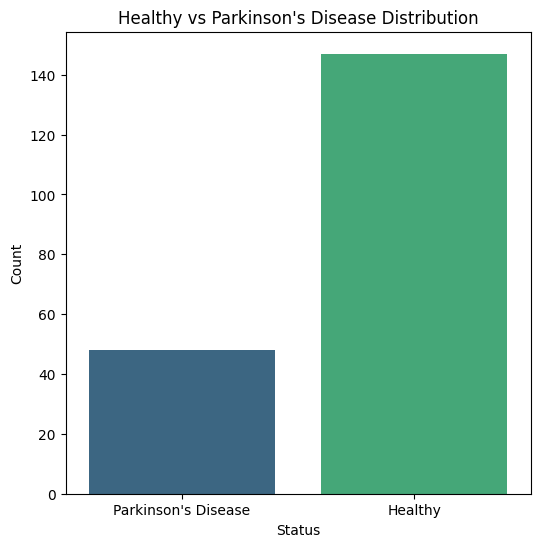

In [11]:
# Count the number of instances in each class
class_counts = y.value_counts()

# Visualize the class distribution using a bar plot
plt.figure(figsize=(6, 6))

# Set hue to class_counts.index and disable the legend
sns.barplot(x=class_counts.index, y=class_counts.values, hue=class_counts.index, palette="viridis", legend=False)

plt.title('Healthy vs Parkinson\'s Disease Distribution')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Parkinson\'s Disease', 'Healthy'])
plt.show()


In [8]:

# Scaling the numeric features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_numeric)

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, stratify=y, random_state=2)




In [9]:

# Define new models to evaluate
new_models = {
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(),
    'Naive Bayes': GaussianNB(),
    'Neural Network (MLPClassifier)': MLPClassifier(max_iter=1000)
}

# Initialize lists to store performance metrics
accuracy = []
precision = []
recall = []
f1 = []

for name, model in new_models.items():
    classifier = model.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)

    # Append performance metrics to corresponding lists
    accuracy.append(accuracy_score(y_test, y_pred))
    precision.append(precision_score(y_test, y_pred))
    recall.append(recall_score(y_test, y_pred))
    f1.append(f1_score(y_test, y_pred))

    # Print performance for each model
    print(f"{name}:")
    print(f"  Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"  Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"  Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"  F1 Score: {f1_score(y_test, y_pred):.4f}")
    print("-" * 40)

# Create a DataFrame to store the results
results_new_models = pd.DataFrame({
    "Model": list(new_models.keys()),
    "Accuracy": [round(a, 4) for a in accuracy],
    "Precision": [round(p, 4) for p in precision],
    "Recall": [round(r, 4) for r in recall],
    "F1 Score": [round(f, 4) for f in f1]
})


K-Nearest Neighbors:
  Accuracy: 0.9492
  Precision: 0.9362
  Recall: 1.0000
  F1 Score: 0.9670
----------------------------------------
Gradient Boosting:
  Accuracy: 0.9153
  Precision: 0.9333
  Recall: 0.9545
  F1 Score: 0.9438
----------------------------------------
XGBoost:
  Accuracy: 0.8983
  Precision: 0.9130
  Recall: 0.9545
  F1 Score: 0.9333
----------------------------------------
Naive Bayes:
  Accuracy: 0.6949
  Precision: 0.9643
  Recall: 0.6136
  F1 Score: 0.7500
----------------------------------------
Neural Network (MLPClassifier):
  Accuracy: 0.9492
  Precision: 0.9556
  Recall: 0.9773
  F1 Score: 0.9663
----------------------------------------


                                Accuracy  Precision  Recall  F1 Score
Model                                                                
K-Nearest Neighbors               0.9492     0.9362  1.0000    0.9670
Gradient Boosting                 0.9153     0.9333  0.9545    0.9438
XGBoost                           0.8983     0.9130  0.9545    0.9333
Naive Bayes                       0.6949     0.9643  0.6136    0.7500
Neural Network (MLPClassifier)    0.9492     0.9556  0.9773    0.9663


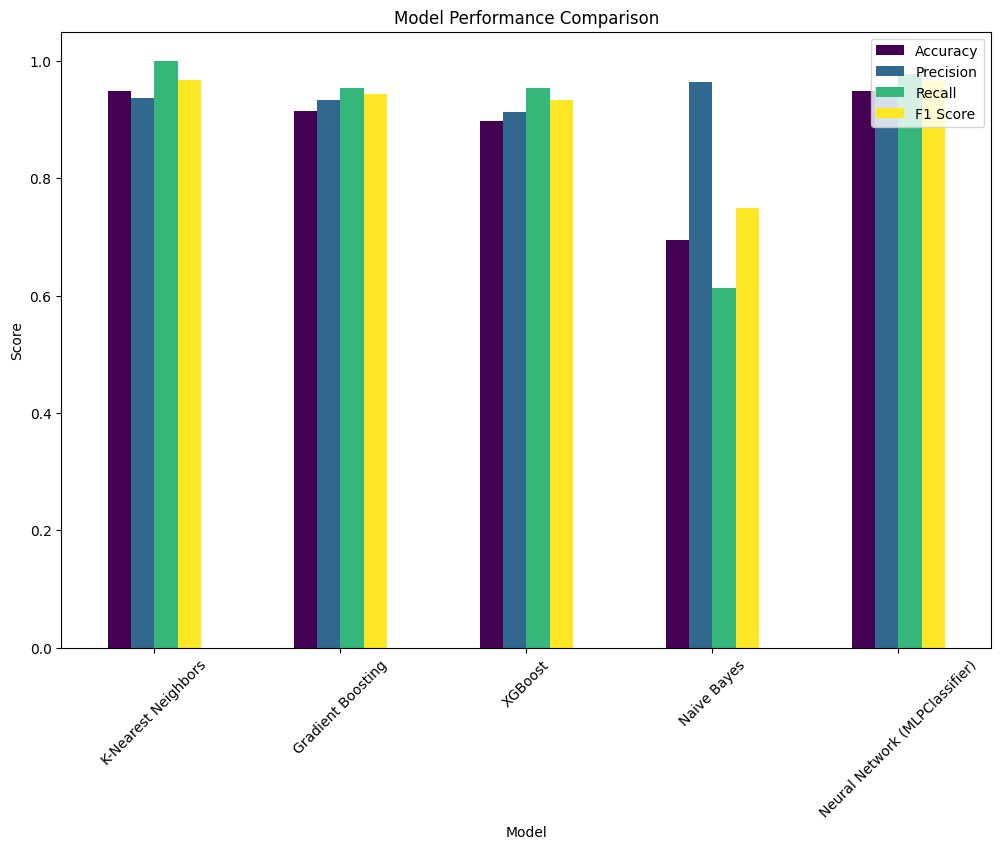

In [10]:

# Set the Model column as the index for better readability
results_new_models.set_index('Model', inplace=True)

# Display the results DataFrame
print(results_new_models)

# Visualize the model comparison
results_new_models.plot(kind='bar', figsize=(12, 8), colormap='viridis')
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()